In [ ]:
import requests
import re
from collections import OrderedDict
from itertools import repeat
from tqdm import tqdm_notebook
import pandas as pd
import lxml.html
from selenium.webdriver import Chrome
from bs4 import BeautifulSoup

In [ ]:
page_urls = []
for i in range(3611):
    page_urls.append('http://www.poemlove.co.kr/bbs/board.php?bo_table=tb01&page=1&page={}'.format(i+1))

In [179]:
page_urls_m = []
for i in range(3611):
    page_urls_m.append('http://poemlove.co.kr/m/bbs/board.php?bo_table=tb01&page={}'.format(i+1))

In [347]:
urls = []

for url in tqdm_notebook(page_urls):
    req = requests.get(url)
    root = lxml.html.fromstring(req.text)
    for i in root.cssselect('li a')[16:]:
        urls.append(i.attrib['href'])

In [ ]:
wa = []
aa = []
ta = []
# 1페이지

req = requests.get(page_urls[0])
root = lxml.html.fromstring(req.text)
a = []
for i in root.cssselect('tr td a')[2:]:
    k = i.text_content().strip().replace('\n','').replace('\t','')
    a.append(re.sub('\(\d+\)|\(-\d+\)','aa',k))
a = a[33:]

while a:
    try:
        a.remove('aa')
    except:
        break
        
a = a[:-11]

for i in range(len(a)):
    if i % 3 == 0:
        if i != "":
            ta.append(a[i])
        else:
            ta.append('blank')
    elif i % 3 == 1:
        if i != "":
            aa.append(a[i])
        else:
            aa.append('blank')
    elif i % 3 == 2:
        if i != "":
            wa.append(a[i])
        else:
            wa.append('blank')  
            
# 2~10페이지
for url in tqdm_notebook(page_urls[1:10]):
    req = requests.get(url)
    root = lxml.html.fromstring(req.text)
    a = []
    for i in root.cssselect('tr td a')[2:]:
        k = i.text_content().strip().replace('\n','').replace('\t','')
        a.append(re.sub('\(\d+\)|\(-\d+\)','aa',k))
    a = a[33:]
    
    while a:
        try:
            a.remove('aa')
        except:
            break

    a = a[:-12]

    for i in range(len(a)):
        if i % 3 == 0:
            if i != "":
                ta.append(a[i])
            else:
                ta.append('blank')
        elif i % 3 == 1:
            if i != "":
                aa.append(a[i])
            else:
                aa.append('blank')
        elif i % 3 == 2:
            if i != "":
                wa.append(a[i])
            else:
                wa.append('blank')  


# 11~3610페이지
for url in tqdm_notebook(page_urls[10:3610]):
    req = requests.get(url)
    root = lxml.html.fromstring(req.text)
    a = []
    for i in root.cssselect('tr td a')[2:]:
        k = i.text_content().strip().replace('\n','').replace('\t','')
        a.append(re.sub('\(\d+\)|\(-\d+\)','aa',k))
    a = a[33:]
    
    while a:
        try:
            a.remove('aa')
        except:
            break

    a = a[:-13]

    for i in range(len(a)):
        if i % 3 == 0:
            if i != "":
                ta.append(a[i])
            else:
                ta.append('blank')
        elif i % 3 == 1:
            if i != "":
                aa.append(a[i])
            else:
                aa.append('blank')
        elif i % 3 == 2:
            if i != "":
                wa.append(a[i])
            else:
                wa.append('blank')  


# 3611페이지

req = requests.get(page_urls[3610])
root = lxml.html.fromstring(req.text)
a = []
for i in root.cssselect('tr td a')[2:]:
    k = i.text_content().strip().replace('\n','').replace('\t','')
    a.append(re.sub('\(\d+\)|\(-\d+\)','aa',k))
a = a[33:]

while a:
    try:
        a.remove('aa')
    except:
        break

a = a[:-2]

for i in range(len(a)):
    if i % 3 == 0:
        if i != "":
            ta.append(a[i])
        else:
            ta.append('blank')
    elif i % 3 == 1:
        if i != "":
            aa.append(a[i])
        else:
            aa.append('blank')
    elif i % 3 == 2:
        if i != "":
            wa.append(a[i])
        else:
            wa.append('blank')  
            

In [74]:
contents = []
for i in tqdm_notebook(urls):
    try:
        req = requests.get(i)
        root = lxml.html.fromstring(req.text)
        text = root.cssselect('span#writeContents')[0].text_content()
        text = re.sub("[(\xa0)]", "", text)
        text = re.sub('[(\u3000)]',' ', text)
        text = re.sub("[a-zA-Z]+ *?[a-zA-Z]+", "<ENG>", text)
        text = re.sub("[0-9]+ *?[0-9]+", "<NUM>", text)
        text = re.sub("[一-龥]+", "<CHI>", text)
        text = re.sub("[ぁ-ゔ]+|[ァ-ヴー]+", "<JAP>", text)
        contents.append([x.strip() for x in re.split(r"[\r]", text) if len(x.strip()) > 1])
    except:
        contents.append(None)

In [ ]:
poetry_final = pd.DataFrame({'url':page_urls_m
                      'writer':wa, 
                      'author':aa,
                      'title':ta,
                      'contents':contents})

In [10]:
poetry_final = poetry_final.drop_duplicates(['contents'],keep='first').reset_index(drop = True)
len(poetry_final)

143736

In [0]:
poetry_final = poetry_final[poetry_final.title.isnull() == False].reset_index(drop = True)
poetry_final = poetry_final[poetry_final.contents.isnull() == False].reset_index(drop = True)
poetry_final = poetry_final[poetry_final.author.isnull() == False].reset_index(drop = True)

In [0]:
poetry_final['title'] = poetry_final.title.apply(lambda x: x.split(' - '))

a = []
for i in range(len(poetry_final.title)):
    if len(poetry_final.title[i]) > 2:
        a.append(i)
        
poetry_final = poetry_final.drop(a,0).reset_index(drop = True)

In [0]:
b = []
for i in range(len(poetry_final.title)):
    if len(poetry_final.title[i]) == 2:
        b.append([poetry_final.title[i][0]])
    else:
        b.append(poetry_final.title[i])
poetry_final['title'] = b

In [ ]:
c = []
for content in tqdm_notebook(poetry_final.contents):
    a = []
    for i in range(len(content.split("'")[1:-1])):
        if i % 2 == 0:
            a.append(content.split("'")[1:-1][i])
    c.append(a)
poetry_final['contents'] = c

In [0]:
len_con = []
for i in poetry_final['contents']:
    len_con.append(len(i))

In [35]:
len_con_df = pd.DataFrame(len_con)
len_con_df.describe()

,0
count,143158.000000
mean,16.472750
std,22.840872
min,0.000000
25%,8.000000
50%,16.000000
75%,22.000000
max,2712.000000


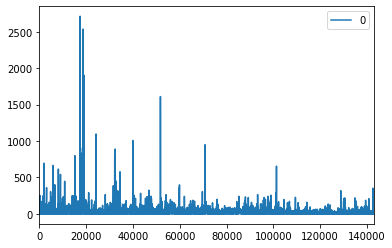

In [36]:
len_con_df.plot()

In [58]:
poetry_final.loc[len_con_df[0] == 1, 'contents']

71                                                 [**, **]
614                          [수홍이한테 문자 보낸다., 수홍이한테 문자 보낸다.]
1054                                     [첨부파일 참조, 첨부파일 참조]
1124                         [첨부파일 참조 바랍니다., 첨부파일 참조 바랍니다.]
2019      [내 사랑 그대여! 내 눈을 감겨요. 나 그대 만질 수 있어니;내 사랑 그대여 <N...
                                ...                        
143153    [나는 내가 부족한 나무라는 걸 안다 내딴에는 곧게 자란다 생각했지만 어떤 나무는 ...
143154    [언제나 당신은 저만치에만 있습니다 내가 다가갈 수 없는 꼭 그만치에 서서 나를 지...
143155    [어서, 하마를 치워야 할텐데 저 하마를 밖으로 끌어내야 할텐데 늦장마 끝나고 서늘...
143156    [돌아보면 언제나 혼자였다.나를 사랑한다고 다가오는 사람에게선내가 물러났고,내가 사...
143157    [살아가면서 많은 것이 묻혀지고 잊혀진다 하더라도 그대 이름만은 내 가슴에 남아 있...
Name: contents, Length: 26573, dtype: object

In [0]:
import kss

In [0]:
for i in poetry_final.loc[len_con_df[0] == 1, 'contents'].index:
    poetry_final.contents[i] += kss.split_sentences(poetry_final.contents[i][0])

In [0]:
len_con = []
for i in poetry_final['contents']:
    len_con.append(len(i))

In [70]:
len_con_df = pd.DataFrame(len_con)
len_con_df.describe()

,0
count,143158.000000
mean,17.231150
std,22.526778
min,0.000000
25%,9.000000
50%,16.000000
75%,22.000000
max,2712.000000


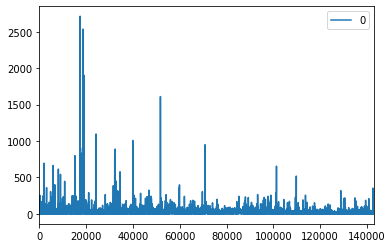

In [71]:
len_con_df.plot()

In [73]:
poetry_final.loc[len_con_df[0] < 5, 'contents']

35        [겨울, 맥향, 그 날 동성로는 성탄준비로 인파가 붐볐다. 부러운 눈으로 그들을 보...
71                                                 [**, **]
72        [아, 시원해., 갑자기 망치로 얻어 맞은 듯 멍청해지네. 체. 통영시인 김종수랑 ...
112       [오프라 윈프라, <ENG>://<ENG>.<ENG>.<ENG>/<ENG>?v=<E...
178       [달빛 젖은 눈을 밟는 사람은 아름답다., 내사랑너!너의 말대로 너가 선생인 건 다...
                                ...                        
143148    [오늘밤 깊어가는 어둠속으로 내내 당신이 내 마음에 걸려 있습니다. 내 마음에 당신...
143149    [스물 셋 청춘의 문밖에 떡하니 내다 건 사랑의 문패 그 문패를 보고 얼마나 많은 ...
143150    [새벽에 깨어나 반짝이는 별을 보고 있으면 이 세상 깊은 어디에 마르지 않는 사랑의...
143151    [초대받지 못한 잔치에서 초대받지 않은 손님으로 두 다리를 세워두기란 불 가마 앞에...
143152    [그리운 부석사정 호 승사랑하다가 죽어버려라오죽하면 비로자나불이 손가락에 매달려 앉...
Name: contents, Length: 17921, dtype: object

In [76]:
new_contents = []
for i in tqdm_notebook(range(len(poetry_final['contents']))):
    a = []
    try:
        for j in range(len(poetry_final['contents'][i][:2])):
            if poetry_final.title[i][0] in poetry_final['contents'][i][:2][j]:
                poetry_final['contents'][i].remove(poetry_final['contents'][i][:2][j])
            if poetry_final.author[i][0] in poetry_final['contents'][i][:2][j]:
                poetry_final['contents'][i].remove(poetry_final['contents'][i][:2][j])
    except:
        poetry_final['contents'][i]
            

In [ ]:
index = []
for i in range(len(poetry.contents)):
    if str(poetry_final.contents[i]) == 'nan':
        index.append(i)

poetry_final = poetry_final.drop(index,0)

In [44]:
import re
def remove_bracket(row):
    pattern = r'\[.*?\]'
    return re.sub(pattern, '', row)

In [64]:
con_f = []
for i in contents:
    con_sf = []
    for j in i:
        remove_bracket(j)
        if j != None:
            con_sf.append(j)
    con_f.append('+++'.join(con_sf))
    
poetry['contents'] = con_f

In [72]:
poetry = poetry.reset_index(drop=True)
poetry.to_csv("poetry_real_final.csv",index=False)